# Stock Price Prediction

In [1]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

In [2]:
# reading the dataset file
df = pd.read_csv('1729258-1613615-Stock_Price_data_set_(1).csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [4]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200
1008,2022-02-04,407.309998,412.769989,396.640015,410.170013,410.170013,7782400


In [5]:
df.shape

(1009, 7)

In [6]:
df.index

RangeIndex(start=0, stop=1009, step=1)

In [7]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [9]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


In [10]:
df.isna().any()

Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

In [11]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [12]:
df1 = df['Close']

In [13]:
df1

0       254.259995
1       265.720001
2       264.559998
3       250.100006
4       249.470001
           ...    
1004    427.140015
1005    457.130005
1006    429.480011
1007    405.600006
1008    410.170013
Name: Close, Length: 1009, dtype: float64

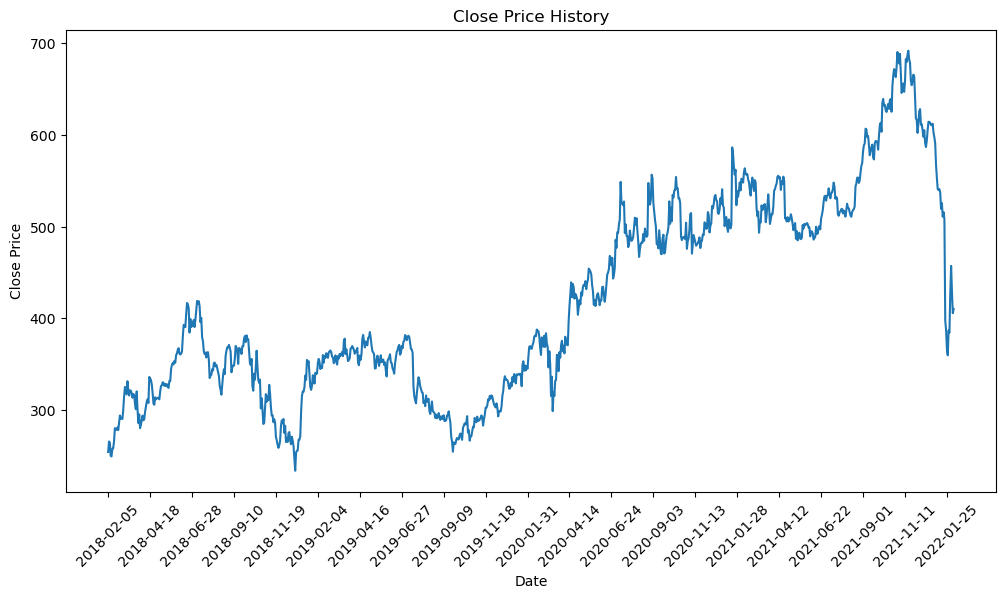

In [14]:
plt.figure(figsize=(12, 6))
plt.title('Close Price History')
plt.plot(df1)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(range(0, len(df['Date']), 50), df['Date'][::50], rotation=45)
plt.show()

## Splitting Data into train and test data

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
print(df1)

[[0.04451626]
 [0.06954849]
 [0.06701469]
 ...
 [0.4272515 ]
 [0.37509011]
 [0.38507243]]


In [16]:
train_size=int(len(df1)*0.70)
test_size=len(df1)-train_size
data_train,data_test=df1[0:train_size,:],df1[train_size:len(df1),:1]

In [17]:
train_size,test_size

(706, 303)

In [18]:
data_train

array([[0.04451626],
       [0.06954849],
       [0.06701469],
       [0.03542955],
       [0.03405342],
       [0.05257641],
       [0.05327534],
       [0.0701601 ],
       [0.10133021],
       [0.09750767],
       [0.09757319],
       [0.10301218],
       [0.09667768],
       [0.11369343],
       [0.13167034],
       [0.12391599],
       [0.12559796],
       [0.12343551],
       [0.14672022],
       [0.1771914 ],
       [0.19951508],
       [0.19064677],
       [0.18156003],
       [0.2131015 ],
       [0.19095254],
       [0.17911361],
       [0.19149862],
       [0.19049385],
       [0.18472731],
       [0.17387127],
       [0.18265218],
       [0.18042421],
       [0.15906164],
       [0.14647998],
       [0.18887749],
       [0.1459339 ],
       [0.11334393],
       [0.13426968],
       [0.10137394],
       [0.10875693],
       [0.12026823],
       [0.13125532],
       [0.12007165],
       [0.12243068],
       [0.14021101],
       [0.15244317],
       [0.16463161],
       [0.169

In [19]:
# Prepare the data for LSTM
def create_dataset(data, lookback):
    X, Y = [], []
    for i in range(len(data) - lookback - 1):
        X.append(data[i:(i + lookback), 0])
        Y.append(data[i + lookback, 0])
    return np.array(X), np.array(Y)

In [20]:
lookback = 100
X_train, Y_train = create_dataset(data_train, lookback)
X_test, Y_test = create_dataset(data_test, lookback)

In [21]:
print(X_train.shape)
print(Y_train.shape)

(605, 100)
(605,)


In [22]:
print(X_test.shape)
print(Y_test.shape)

(202, 100)
(202,)


In [23]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] , 1)

## Model 1 : LSTM

In [24]:
# Create the LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [25]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(lookback, 1)))
model.add(LSTM(units=50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 30651 (119.73 KB)
Trainable params: 30651 (119.73 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
# Train the model
model.fit(X_train, Y_train, batch_size = 64, epochs = 100)

Epoch 1/100
10/10 [==============================] - 5s 164ms/step - loss: 0.0334
Epoch 2/100
10/10 [==============================] - 2s 158ms/step - loss: 0.0062
Epoch 3/100
10/10 [==============================] - 1s 146ms/step - loss: 0.0040
Epoch 4/100
10/10 [==============================] - 2s 164ms/step - loss: 0.0031
Epoch 5/100
10/10 [==============================] - 2s 163ms/step - loss: 0.0024
Epoch 6/100
10/10 [==============================] - 2s 154ms/step - loss: 0.0023
Epoch 7/100
10/10 [==============================] - 2s 151ms/step - loss: 0.0022
Epoch 8/100
10/10 [==============================] - 1s 138ms/step - loss: 0.0021
Epoch 9/100
10/10 [==============================] - 1s 149ms/step - loss: 0.0021
Epoch 10/100
10/10 [==============================] - 2s 154ms/step - loss: 0.0021
Epoch 11/100
10/10 [==============================] - 2s 159ms/step - loss: 0.0020
Epoch 12/100
10/10 [==============================] - 2s 182ms/step - loss: 0.0020
Epoch 13/100


In [28]:
# prediction and check performance metrics
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

7/7 [==============================] - 0s 14ms/step


In [29]:
# Transformback to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

**Evaluating LSTM Model**

In [30]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(Y_train,train_predict))

374.0813082140154

In [31]:
math.sqrt(mean_squared_error(Y_test,test_predict))

558.9839876857593

## Plotting

In [32]:
# Shift train predictions for plotting
look_back = 100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back : len(train_predict) + look_back, : ] = train_predict

# Shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2) + 1:len(df1) - 1, : ] = test_predict

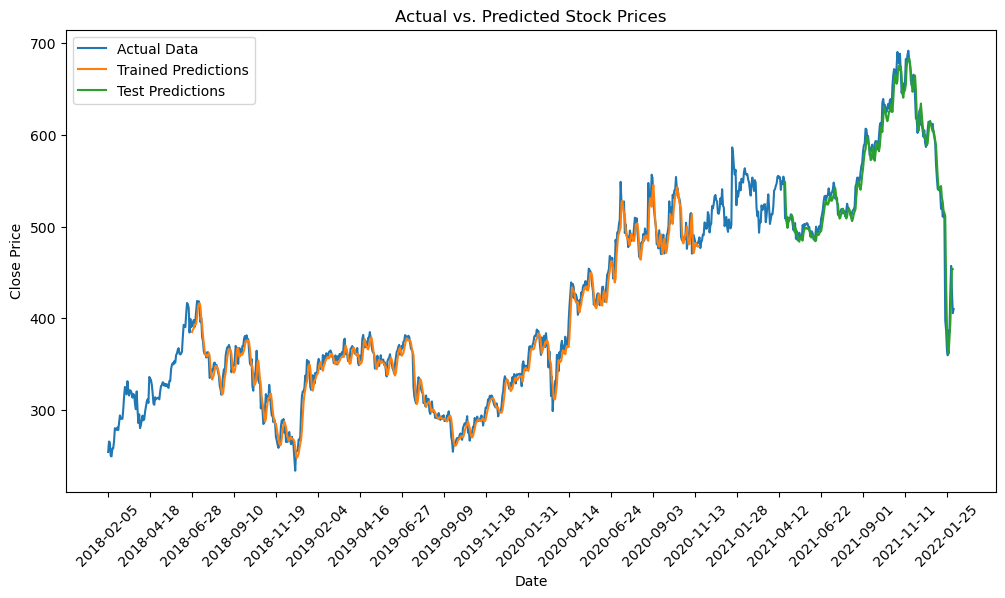

In [33]:
# Plot baseline and predictions
plt.figure(figsize=(12, 6))
plt.plot(scaler.inverse_transform(df1), label='Actual Data')
plt.plot(trainPredictPlot, label='Trained Predictions')
plt.plot(testPredictPlot, label='Test Predictions')
plt.title('Actual vs. Predicted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(range(0, len(df['Date']), 50), df['Date'][::50], rotation=45)
plt.legend()
plt.show()

## Model 2 : SimpleRNN

In [34]:
from tensorflow.keras.layers import LSTM,SimpleRNN
model=Sequential()
model.add(SimpleRNN(50,return_sequences=True,input_shape=(100,1)))
model.add(SimpleRNN(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [35]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 100, 50)           2600      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 50)                5050      
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 7701 (30.08 KB)
Trainable params: 7701 (30.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [105]:
model.fit(X_train, Y_train,validation_data = (X_test,Y_test), batch_size = 128, epochs = 100)

Epoch 1/100
5/5 [==============================] - 0s 43ms/step - loss: 3.8927e-04 - val_loss: 0.0036
Epoch 2/100
5/5 [==============================] - 0s 38ms/step - loss: 3.7809e-04 - val_loss: 0.0039
Epoch 3/100
5/5 [==============================] - 0s 37ms/step - loss: 3.7788e-04 - val_loss: 0.0040
Epoch 4/100
5/5 [==============================] - 0s 36ms/step - loss: 4.1511e-04 - val_loss: 0.0047
Epoch 5/100
5/5 [==============================] - 0s 38ms/step - loss: 4.4322e-04 - val_loss: 0.0045
Epoch 6/100
5/5 [==============================] - 0s 36ms/step - loss: 4.4086e-04 - val_loss: 0.0053
Epoch 7/100
5/5 [==============================] - 0s 38ms/step - loss: 5.0076e-04 - val_loss: 0.0052
Epoch 8/100
5/5 [==============================] - 0s 37ms/step - loss: 5.1437e-04 - val_loss: 0.0053
Epoch 9/100
5/5 [==============================] - 0s 37ms/step - loss: 4.7452e-04 - val_loss: 0.0046
Epoch 10/100
5/5 [==============================] - 0s 37ms/step - loss: 4.7512e-0

In [122]:
train_predict1 = model.predict(X_train)
test_predict1 = model.predict(X_test)

7/7 [==============================] - 0s 6ms/step


In [123]:
train_predict1 = scaler.inverse_transform(train_predict1)
test_predict1 = scaler.inverse_transform(test_predict1)

**Evaluating SimpleRNN Model**

In [124]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(Y_train,train_predict1))

377.99191472457807

In [125]:
math.sqrt(mean_squared_error(Y_test,test_predict1))

541.0816423386041

## Plotting

In [126]:
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict1)+look_back, :] = train_predict1
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict1)+(look_back*2)+1:len(df1)-1, :] = test_predict1

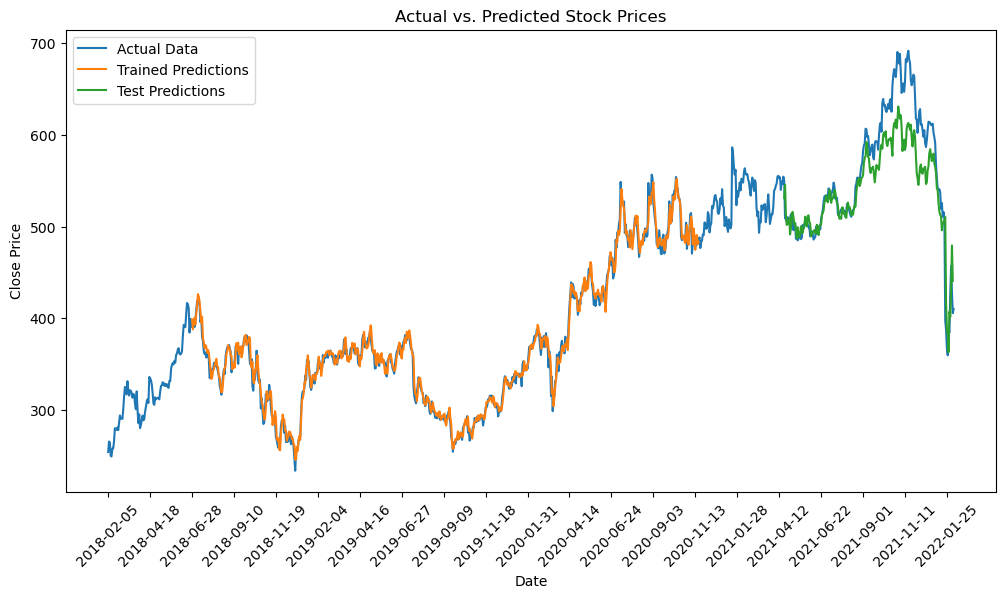

In [127]:
# Plot baseline and predictions
plt.figure(figsize=(12, 6))
plt.plot(scaler.inverse_transform(df1), label='Actual Data')
plt.plot(trainPredictPlot, label='Trained Predictions')
plt.plot(testPredictPlot, label='Test Predictions')
plt.title('Actual vs. Predicted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(range(0, len(df['Date']), 50), df['Date'][::50], rotation=45)
plt.legend()
plt.show()

## Futher Prediction for 30days

In [128]:
len(data_test)

303

In [129]:
x_input = data_test[203:].reshape(1,-1)
x_input.shape

(1, 100)

In [130]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [131]:
temp_input

[0.7623031220089325,
 0.770232186519946,
 0.7764574241046989,
 0.7460518342503559,
 0.741049807175792,
 0.779297134920363,
 0.7849981594001756,
 0.7830978186350088,
 0.7836438967059076,
 0.7644437065449226,
 0.797667144433283,
 0.8223062503372986,
 0.8284441613012656,
 0.8070377960750383,
 0.8757563085718285,
 0.8851269602135838,
 0.8692906961575151,
 0.8710599825542908,
 0.8587841584420446,
 0.8541971550699885,
 0.8647255577514177,
 0.8735501313222742,
 0.8615145487965392,
 0.8826586764115594,
 0.884908581408719,
 0.854634045922767,
 0.9158383843680022,
 0.9412202154248719,
 0.9562481616145222,
 0.9493895237067091,
 0.9371572940990189,
 0.9614687007370002,
 0.9969856403113886,
 0.9770209932746399,
 0.9694850896844873,
 0.9925732858122798,
 0.9491274149699269,
 0.8995870966094257,
 0.9121032955512327,
 0.9220200252638868,
 0.9021864325955293,
 0.9254931407712357,
 0.9801664073316425,
 0.9730019329394415,
 0.9906293483582447,
 1.0,
 0.9788777395352508,
 0.9718441840840797,
 0.9290317157

In [132]:
lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

[0.36466587]
101
1 day input [0.77023219 0.77645742 0.74605183 0.74104981 0.77929713 0.78499816
 0.78309782 0.7836439  0.76444371 0.79766714 0.82230625 0.82844416
 0.8070378  0.87575631 0.88512696 0.8692907  0.87105998 0.85878416
 0.85419716 0.86472556 0.87355013 0.86151455 0.88265868 0.88490858
 0.85463405 0.91583838 0.94122022 0.95624816 0.94938952 0.93715729
 0.9614687  0.99698564 0.97702099 0.96948509 0.99257329 0.94912741
 0.8995871  0.9121033  0.92202003 0.90218643 0.92549314 0.98016641
 0.97300193 0.99062935 1.         0.97887774 0.97184418 0.92903172
 0.91780432 0.92704392 0.94309869 0.93916696 0.89124314 0.83853568
 0.83569596 0.804373   0.82743933 0.85559515 0.86105593 0.82374784
 0.82518942 0.80968086 0.79532991 0.81072929 0.78019265 0.77073453
 0.78604659 0.81046718 0.83082499 0.83049742 0.82837857 0.82311443
 0.82274301 0.8261288  0.80505013 0.79397565 0.78038929 0.72877398
 0.69769113 0.67097703 0.66833397 0.67049655 0.66258921 0.623228
 0.63740416 0.60487972 0.61593233 0

In [133]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [134]:
len(df1)

1009

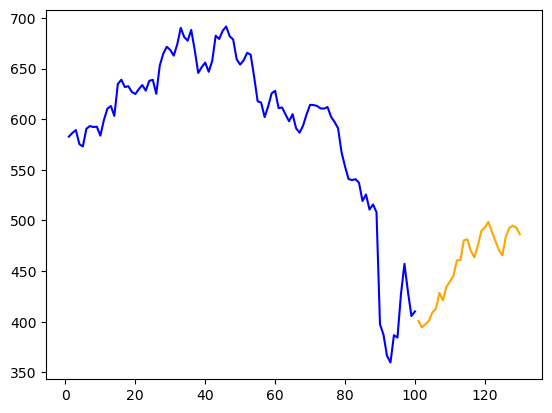

In [135]:
plt.plot(day_new,scaler.inverse_transform(df1[909:]), color = 'b')
plt.plot(day_pred,scaler.inverse_transform(lst_output), color = 'orange')

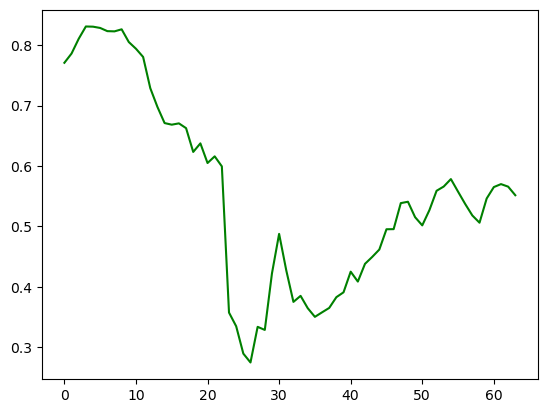

In [136]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[975:], color = 'g')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


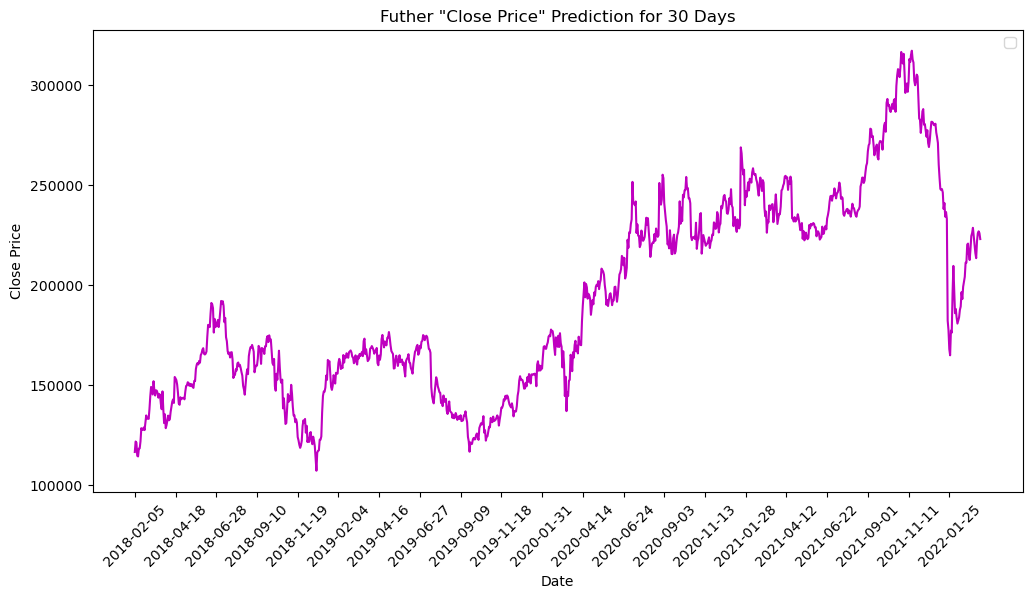

In [138]:
plt.figure(figsize=(12, 6))
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3, color ='m')
plt.title('Futher \"Close Price\" Prediction for 30 Days')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(range(0, len(df['Date']), 50), df['Date'][::50], rotation=45)
plt.legend()
plt.show()